# Digit Recognizer 

Anusha Ramamurthy

# Data Description

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line with the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

3
7
8
(27997 more lines)
The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

# Lets read the datasets into dataframes to start working on them

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline

import sklearn as sk
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from scipy import stats

In [2]:
df_train = pd.read_csv("train.csv",delimiter=',')

In [3]:
df_train.describe

<bound method DataFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11  

Looks like we have 42000 rows x 785 columns in the training set

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lets try and visualize the dataset to get some intuition about it

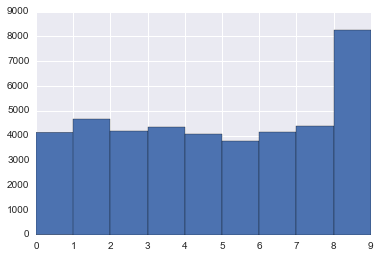

In [5]:
df_train['label'].hist(bins=9)

In [6]:
df_test = pd.read_csv("test.csv",delimiter=',')

In [7]:
df_test.describe

<bound method DataFrame.describe of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0    

The test set has 28000 rows x 784 columns

# Redefine the shapes

In [8]:
# create the training & test sets, skipping the header row with [1:]
dataset = df_train
target = dataset[[0]].values.ravel()
train = dataset.iloc[:,1:].values
test = df_test.values

# convert to array, specify data type, and reshape
target = target.astype(np.uint8)
train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
test = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

print('Training Set Shape :',train.shape)
print('Test Set Shape:',test.shape)

('Training Set Shape :', (42000, 1, 28, 28))
('Test Set Shape:', (28000, 1, 28, 28))


I have reshaped the train set to have (42k,1) shape, i.e. each row will contain a 28 by 28 matrix of pixel color values. The test set is also reshaped similarly

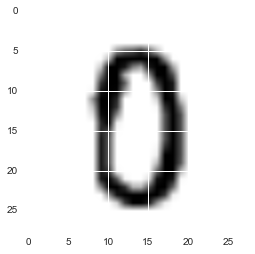

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(train[1675][0], cmap=cm.binary) # draw the picture

Kaggle provides a starter code of RandomForestClassifier
Link: https://www.kaggle.com/c/digit-recognizer/forums/t/2299/getting-started-python-sample-code-random-forest
Lets see the results it yeilds

In [10]:
from sklearn.ensemble import RandomForestClassifier
from numpy import genfromtxt, savetxt

dataset = genfromtxt(open('train.csv', 'r'), delimiter=',', dtype='int64')[1:]
x_target = [x[0] for x in dataset]
x_train = [x[1:] for x in dataset]
print "Reading test set"
x_test = genfromtxt(open('test.csv', 'r'), delimiter=',', dtype='int64')[1:]

    #create and train the random forest
rf = RandomForestClassifier(n_estimators=1000, n_jobs=2)
print "Fitting RF classifier"
rf.fit(x_train, x_target)

print "Predicting test set"
savetxt('submission-version-1.csv', rf.predict(x_test), delimiter=',', fmt='%d')


Reading test set
Fitting RF classifier
Predicting test set


In [11]:
dataset = genfromtxt(open('train.csv', 'r'), delimiter=',', dtype='int64')[1:]
x_target = [x[0] for x in dataset]
x_train = [x[1:] for x in dataset]

In [12]:
x_test = genfromtxt(open('test.csv', 'r'), delimiter=',', dtype='int64')[1:]

We see a hundred percent accuracy!!

In [13]:
#Accuracy
preds = pd.read_csv("submission-version-1.csv",delimiter=',',header=None)
#preds
#accuracy_score(y_test, rfc.predict(X_test))
rf.score(x_test,preds)
#print ("Score accuracy ytest and predicted:",sk.metrics.accuracy_score(rf_test, rf_results))

1.0

Lets try Deep Learning Algorithms

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from nolearn.dbn import DBN
import numpy as np

dataset = df_train
target = dataset[[0]].values.ravel()
train = dataset.iloc[:,1:].values
test = df_test.values

# train the Deep Belief Network with 784 input units (the flattened,
#  28x28 grayscale image), 800 hidden units in the 1st hidden layer,
# 800 hidden nodes in the 2nd hidden layer, and 10 output units (one
# for each possible output classification, which are the digits 1-10)
dbn = DBN([train.shape[1], 800, 800, 10],learn_rates = 0.1,learn_rate_decays = 0.9,epochs = 10,verbose = 1)
dbn.fit(train, target)

# compute the predictions for the test data and show a classification
# report
preds = dbn.predict(test)
savetxt('submission-version-1.csv',preds, delimiter=',', fmt='%d')


[DBN] fitting X.shape=(42000, 784)
[DBN] layers [784, 800, 800, 10]
[DBN] Fine-tune...

100%



Epoch 1:

100%



  loss nan
  err  0.90234375
  (0:00:22)
Epoch 2:

100%



  loss nan
  err  0.90234375
  (0:00:23)
Epoch 3:

100%



  loss nan
  err  0.902701028963
  (0:00:22)
Epoch 4:

100%



  loss nan
  err  0.902748666159
  (0:00:21)
Epoch 5:

100%



  loss nan
  err  0.900438262195
  (0:00:21)
Epoch 6:

100%



  loss nan
  err  0.901867378049
  (0:00:21)
Epoch 7:

100%



  loss nan
  err  0.901081364329
  (0:00:22)
Epoch 8:

100%



  loss nan
  err  0.902486661585
  (0:00:22)
Epoch 9:

100%



  loss nan
  err  0.901676829268
  (0:00:22)
Epoch 10:
  loss nan
  err  0.900462080793
  (0:00:22)


In [20]:
dbn.score(train,dbn.predict(test))

0.9999642857142857

Ok looks like Deep Learning Algorithms is good too!

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from nolearn.dbn import DBN
import numpy as np

dataset = datasets.fetch_mldata("MNIST Original")

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(dataset.data / 255.0, 
                                                  dataset.target.astype("int0"), test_size = 0.33)

# train the Deep Belief Network with 784 input units (the flattened,
#  28x28 grayscale image), 800 hidden units in the 1st hidden layer,
# 800 hidden nodes in the 2nd hidden layer, and 10 output units (one
# for each possible output classification, which are the digits 1-10)
dbn = DBN([trainX.shape[1], 800, 800, 10],learn_rates = 0.1,learn_rate_decays = 0.9,epochs = 5,verbose = 1)
dbn.fit(trainX, trainY)

# compute the predictions for the test data and show a classification
# report
preds = dbn.predict(testX)
print classification_report(testY, preds)


gnumpy: failed to import cudamat. Using npmat instead. No GPU will be used.
[DBN] fitting X.shape=(46900, 784)
[DBN] layers [784, 800, 800, 10]
[DBN] Fine-tune...

/Users/aramamurthy/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/nolearn/dbn.py:17: UserWarning: 
The nolearn.dbn module will be removed in nolearn 0.6.  If you want to
continue to use this module, please consider copying the code into
your own project.  And take a look at Lasagne and nolearn.lasagne for
a better neural net toolkit.

  """)
100%



Epoch 1:

100%



  loss 2.3161370549
  err  0.897605020492
  (0:00:30)
Epoch 2:

100%



  loss 2.30504093209
  err  0.898714993169
  (0:00:31)
Epoch 3:

100%



  loss 2.30361328555
  err  0.897690403005
  (0:00:29)
Epoch 4:

100%



  loss 2.30317607115
  err  0.895128927596
  (0:00:29)
Epoch 5:
  loss 2.30394828645
  err  0.897476946721
  (0:00:30)
             precision    recall  f1-score   support

          0       0.61      0.02      0.04      2261
          1       0.01      0.00      0.00      2666
          2       0.06      0.08      0.07      2305
          3       0.04      0.07      0.05      2310
          4       0.20      0.18      0.19      2205
          5       0.06      0.14      0.09      2087
          6       0.10      0.00      0.00      2349
          7       0.09      0.02      0.04      2407
          8       0.05      0.03      0.04      2199
          9       0.04      0.10      0.05      2311

avg / total       0.12      0.06      0.06     23100



In [ ]:
print classification_report(testY, preds)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

(trainX, testX, trainY, testY) = train_test_split(dataset.data / 255.0, 
                                                  dataset.target.astype("int0"), test_size = 0.33)
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(trainX, trainY)
print "done"
print "="*20
print clf

print "Confusion Matrix"
print "="*40
print confusion_matrix(testY, clf.predict(testX))

done
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
Confusion Matrix
[[2238    1    1    0    1    3    6    1    1    1]
 [   0 2615    4    0    0    0    3    4    0    1]
 [  21   39 2160    6    2    2    8   42    4    2]
 [   4   12    7 2270    2   18    1   24   14    9]
 [   1   29    2    0 2206    0    6    5    0   59]
 [   6   10    0   30    3 1993   18    2    3    4]
 [  12    3    0    0    4    9 2238    0    0    0]
 [   0   35    5    0    5    0    0 2252    0   26]
 [   7   33    6   42    9   32   11    7 2099   36]
 [   9    9    2   22   17    1    2   27    6 2230]]


In [17]:
print('KNN score: %f' % clf.fit(trainX, trainY).score(testX, testY))

KNN score: 0.965411
